# Convolutional Neural Network Project

## Sub-project 1:

## Solve Fashion_MNIST with LeNet architecture

In this project you will implement the LeNet architecture of Convolutional Neural Networks. First you will download the Fashion-MNIST dataset. Split into train/validation/test datasets and train the network. Finally, plot the learning curves (train/validation loss and accuracy) and show the confusion matrix.

### 1. Download Fashion-MNIST

In [ ]:

#!/usr/bin/env python3
 
##########################################################
# Copyright (c) Jesper Vang <jesper_vang@me.com>         #
# Created on 02 Aug 2021                                 #
#                                                        #
#  						                                 #
##########################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
from torch.autograd import Variable
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch import optim
import tensorflow as tf
import keras
import keras.layers as layers
from keras.models import Sequential
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard
from keras.datasets import mnist
from sklearn.model_selection import train_test_split


print(f"Pandas Version: {pd.__version__}")
print(f"Numpy Version: {np.__version__}")
print(f"Tensorflow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")


%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 8)

### 2. Split the data into train / validation / test subsets. Make mini-batches, if necesssary.

In [ ]:
# The data is loaded and split
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
 
# Enter data as mnist data set
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# normalizing
x_train = x_train / 255
x_test = x_test / 255
 
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)



In [ ]:
# The training data is divided into train and validation 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

In [ ]:
# Test if the shapes are correct and the values make sense
print("x_train shape: " + str(x_train.shape))
print("y_train shape: " + str(y_train.shape))
print("x_val shape: " + str(x_val.shape))
print("y_val shape: " + str(y_val.shape))
print("x_test shape: " + str(x_test.shape))
print("y_test shape: " + str(y_test.shape))

### 3. Build the LeNet model

In [ ]:
# The LeNet model is build in Keras

model = keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(units=10, activation = 'softmax'))

model.summary()

### 4. Train the model on the dataset

In [ ]:
model.compile(
    loss=keras.metrics.categorical_crossentropy,
    optimizer="adam",
    metrics=["accuracy"],
)

n_EPOCHS = 100 # set to 100 for hand ins

history = model.fit(x_train, y_train, batch_size=128, epochs=n_EPOCHS, verbose=1, validation_data=(x_val, y_val))
score = model.evaluate(x_test, y_test)
print('Val Loss:', score[0])
print('Val accuracy:', score[1])

Epoch 1/100
422/422 [==============================] - 9s 6ms/step - loss: 0.7443 - accuracy: 0.7329 - val_loss: 0.5502 - val_accuracy: 0.7725
Epoch 2/100
422/422 [==============================] - 2s 6ms/step - loss: 0.5061 - accuracy: 0.8093 - val_loss: 0.4857 - val_accuracy: 0.8147
Epoch 3/100
422/422 [==============================] - 2s 6ms/step - loss: 0.4403 - accuracy: 0.8384 - val_loss: 0.4092 - val_accuracy: 0.8477
Epoch 4/100
422/422 [==============================] - 2s 6ms/step - loss: 0.3975 - accuracy: 0.8538 - val_loss: 0.3804 - val_accuracy: 0.8583
Epoch 5/100
422/422 [==============================] - 3s 6ms/step - loss: 0.3701 - accuracy: 0.8659 - val_loss: 0.3378 - val_accuracy: 0.8757
Epoch 6/100
422/422 [==============================] - 2s 6ms/step - loss: 0.3434 - accuracy: 0.8746 - val_loss: 0.3306 - val_accuracy: 0.8758
Epoch 7/100
422/422 [==============================] - 2s 6ms/step - loss: 0.3270 - accuracy: 0.8800 - val_loss: 0.3227 - val_accuracy: 0.8788

### 5. Plot the training curves (Loss and accuracy)

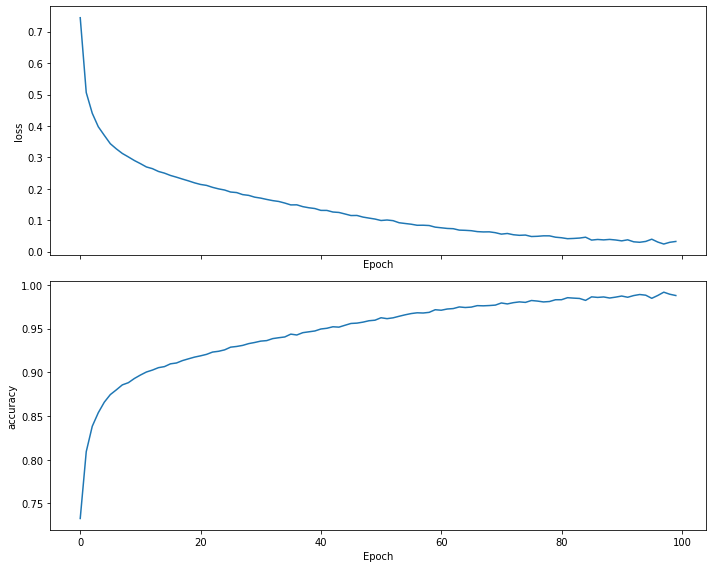

In [ ]:
_, axes = plt.subplots(2, 1, sharex=True)
for ax, k in zip(axes, history.history.keys()):
    ax.set_ylabel(k)
    ax.set_xlabel("Epoch")
    ax.plot(history.history[k], label = k)
plt.tight_layout()

### 6. Show the confusion matrix and accuracy on the test dataset.

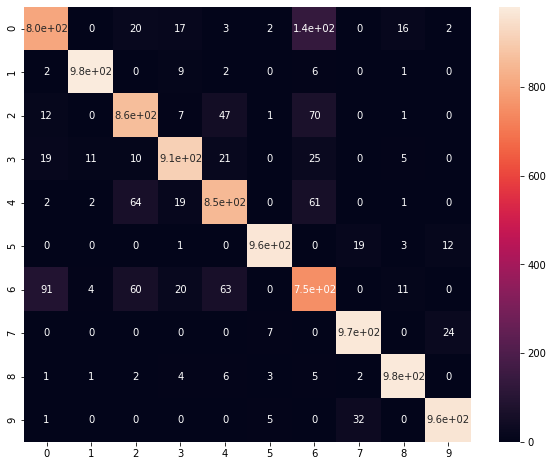

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred=model(x_test)
y_pred=np.argmax(y_pred, axis=1)

y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

In [ ]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.903


### 7. Is LeNet better than the fully connected Neural Network trained in the project from lecture 3? Comment on the results

Answer: 

---


Accuracy of the Neural Network was ~ 0.8, LeNet is ~ 0.89 - it might be maginally better.

## Sub-project 2:

## Use a pretrained model to solve 

In this project you will download the Intel Image Classification dataset (https://www.kaggle.com/puneet6060/intel-image-classification/download).
Find a suitable pretrained Convolutional Neural Network and its weights. Fix the filters and retrain/finetune the top of the network. Show and comment on resuls.

Alternativelly, you can browse Kaggle for some funny datasets like: Dogs vs Cats, Alien vs Predator, Doom vs Animal Crossing, CelebA, etc. Just don't use something easy like MNIST, Fashion-MNIST, etc.

### 1. Download the data

In [ ]:
import tensorflow_datasets as tfds
train_ds, validation_ds, test_ds = tfds.load(
  "cats_vs_dogs",
  # Reserve 10% for validation and 10% for test
  split=["train[:40%]", "train[40%:50%]", "train[50%:60%]"],
  as_supervised=True,  # Include labels
)


test_labels = list()
for image, label in test_ds.as_numpy_iterator():
  test_labels.append(label)
  
print(f"# training samples: {tf.data.experimental.cardinality(train_ds)}")
print(f"# validation samples: {tf.data.experimental.cardinality(validation_ds)}")
print(f"# test samples: {tf.data.experimental.cardinality(test_ds)}")

# training samples: 9305
# validation samples: 2326
# test samples: 2326


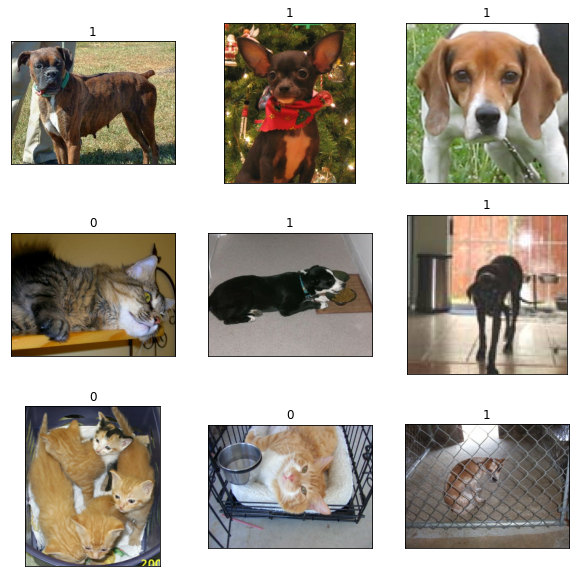

In [ ]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image)
  plt.title(int(label))
  plt.axis('on')
  plt.xticks([])
  plt.yticks([])

### 2. Preprocess the data.

(This might include resizing, augmenting, etc.)




In [ ]:
# Resize data
size = (150, 150)
train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, size), y))
validation_ds = validation_ds.map(lambda x, y: (tf.image.resize(x, size), y))
test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, size), y))

# Batch data
batch_size = 32

train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)
validation_ds = validation_ds.cache().batch(batch_size).prefetch(buffer_size=10)
test_ds = test_ds.cache().batch(batch_size).prefetch(buffer_size=10)



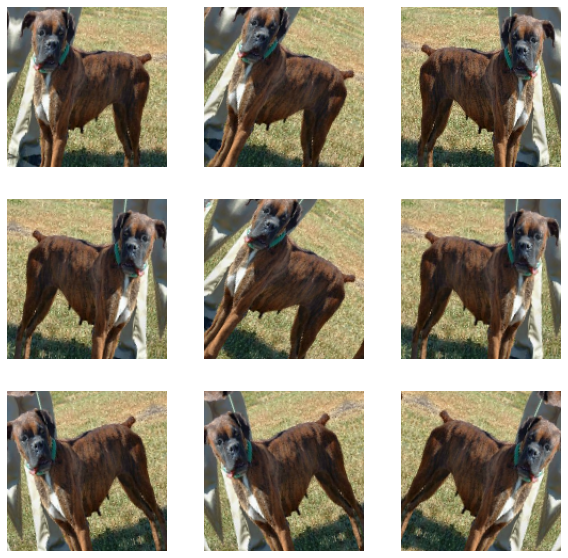

In [ ]:
# The data is augmented in order to make it more representative
data_augmentation = keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
  ])

import numpy as np

for images, labels in train_ds.take(1):
  plt.figure(figsize=(10, 10))
  first_image = images[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(
      tf.expand_dims(first_image, 0), training=True
    )
    plt.imshow(augmented_image[0].numpy().astype("int32"))
    plt.axis("off")

### 3. Split the data (train / test / validation) and make mini-batches.
not necessary 

### 4. Download the pretrained architecture and weights.

This part might include some research and understanding of architecures and the type of data they were trained on.

In [ ]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.dense1 = tf.keras.layers.Dense(4, activation=tf.nn.relu)
    self.dense2 = tf.keras.layers.Dense(5, activation=tf.nn.softmax)
 
  def call(self, inputs):
    x = self.dense1(inputs)
    return self.dense2(x)
 
model = MyModel()

In [ ]:
# also copy from KERAS https://keras.io/guides/transfer_learning/
# The ValueError is a known bug - I dont know how to fix it 
# READ the following - https://github.com/tensorflow/tensorflow/issues/50859
# ValueError: You called `set_weights(weights)` on layer "normalization_8" 
# with a weight list of length 2, but the layer was expecting 3 weights. 
# Provided weights: [array([127.5, 127.5, 127.5]), array([16256.25, 16...

base_model = tf.keras.applications.Xception(
  weights="imagenet",  # Load weights pre-trained on ImageNet.
  input_shape=(150, 150, 3),
  include_top=False, # Do not include the ImageNet classifier at the top.
)  

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(150, 150, 3))
# Apply random data augmentation
# In this case, we will just disturb the already existing data
x = data_augmentation(inputs)

# Pre-trained Xception weights requires that input be normalized
# from (0, 255) to a range (-1., +1.)
# The normalization layer does the following:
#            outputs = (inputs - mean) / sqrt(var)
norm_layer = tf.keras.layers.experimental.preprocessing.Normalization()
mean = np.array([127.5] * 3)
var = mean ** 2
# Scale inputs to [-1, +1]
# x = norm_layer(x)
# norm_layer.set_weights([mean, var])

# The base model is not supposed to train, so we will put it into inference mode
#    `training=False`
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

### 5. Build the larger model that includes the pre-trained part and prepare it for training.

* Show the model summary so you are sure which components are included and how many (un)trainable parameters you have

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 150, 150, 3)       0         
_________________________________________________________________
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2049      
Total params: 20,863,529
Trainable params: 2,049
Non-trainable params: 20,861,480
_____________________________________________

### 6. Train the trainable part of the model

In [ ]:
model.compile(
  optimizer=tf.optimizers.Adam(learning_rate=0.001),
  loss=keras.losses.BinaryCrossentropy(from_logits=True),
  metrics=[keras.metrics.BinaryAccuracy()],
)

epochs = 10
history = model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

Epoch 1/10
291/291 [==============================] - 56s 175ms/step - loss: 2.1820 - binary_accuracy: 0.5688 - val_loss: 1.0812 - val_binary_accuracy: 0.6195
Epoch 2/10
291/291 [==============================] - 48s 165ms/step - loss: 1.1277 - binary_accuracy: 0.5990 - val_loss: 0.7165 - val_binary_accuracy: 0.6354
Epoch 3/10
291/291 [==============================] - 48s 165ms/step - loss: 0.9000 - binary_accuracy: 0.6208 - val_loss: 0.6896 - val_binary_accuracy: 0.6346
Epoch 4/10
291/291 [==============================] - 48s 165ms/step - loss: 0.7870 - binary_accuracy: 0.6205 - val_loss: 0.6536 - val_binary_accuracy: 0.6642
Epoch 5/10
291/291 [==============================] - 48s 166ms/step - loss: 0.7825 - binary_accuracy: 0.6246 - val_loss: 0.6438 - val_binary_accuracy: 0.6715
Epoch 6/10
291/291 [==============================] - 48s 165ms/step - loss: 0.7491 - binary_accuracy: 0.6328 - val_loss: 0.6383 - val_binary_accuracy: 0.6475
Epoch 7/10
291/291 [==========================

In [ ]:
score = model.evaluate(test_ds)
print('Val Loss:', score[0])
print('Val accuracy:', score[1])

73/73 [==============================] - 10s 131ms/step - loss: 0.6781 - binary_accuracy: 0.6251
Val Loss: 0.6780884861946106
Val accuracy: 0.62510746717453


### 7. Show the training plots and confusion matrix

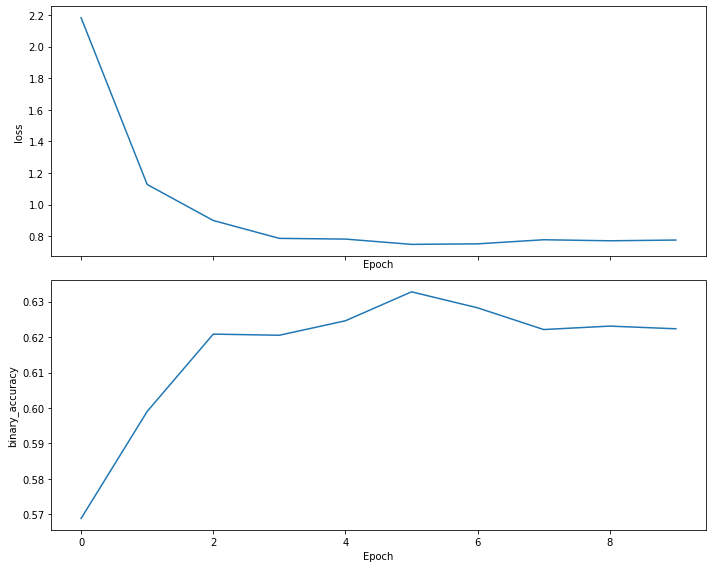

In [ ]:
# Training history
_, axes = plt.subplots(2, 1, sharex=True)
for ax, k in zip(axes, history.history.keys()):
    ax.set_ylabel(k)
    ax.set_xlabel("Epoch")
    ax.plot(history.history[k], label = k)
plt.tight_layout()

ValueError: ignored

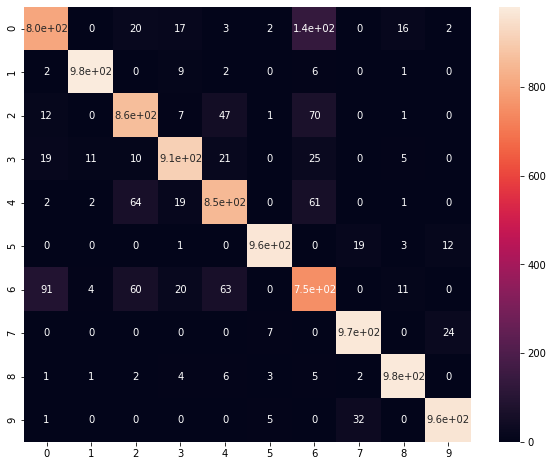

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

result = model.predict(test_ds, steps = 10)

pred = list()
for entry in result:
  if entry>0:
    pred.append(1)
  else:
    pred.append(0)
cm = confusion_matrix(test_labels, pred)

sns.heatmap(cm, annot=True)


### 8. Finetune the model and show the plots, test data confusion matrix and accuracy.

In [ ]:
base_model.trainable = True
model.summary()

model.compile(
  optimizer=tf.optimizers.Adam(1e-5),
  loss=keras.losses.BinaryCrossentropy(from_logits=True),
  metrics=[keras.metrics.BinaryAccuracy()],
)

epochs = 10
history = model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 150, 150, 3)       0         
_________________________________________________________________
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2049      
Total params: 20,863,529
Trainable params: 20,809,001
Non-trainable params: 54,528
____________________________________________

In [ ]:
score = model.evaluate(test_ds)
print('Val Loss:', score[0])
print('Val accuracy:', score[1])

73/73 [==============================] - 10s 130ms/step - loss: 0.3508 - binary_accuracy: 0.8302
Val Loss: 0.3508271276950836
Val accuracy: 0.8301805853843689


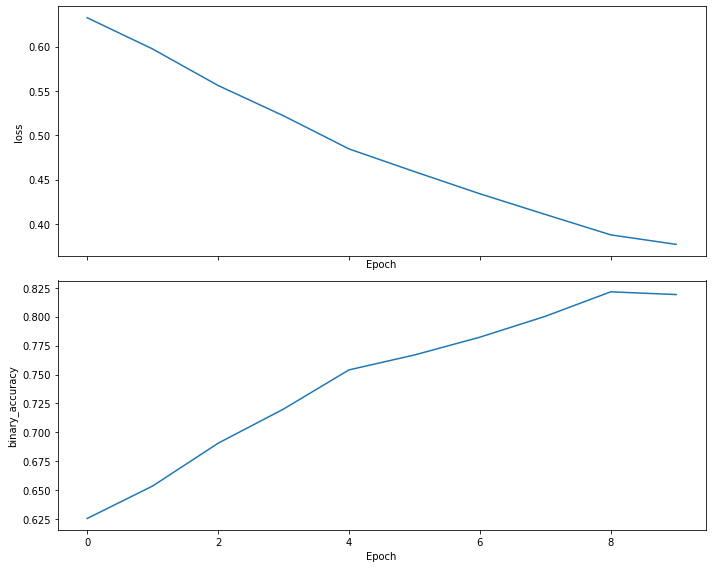

In [ ]:
# Training plot
_, axes = plt.subplots(2, 1, sharex=True)
for ax, k in zip(axes, history.history.keys()):
    ax.set_ylabel(k)
    ax.set_xlabel("Epoch")
    ax.plot(history.history[k], label = k)
plt.tight_layout()

In [ ]:
# Confusion matrix 

finetuned_result = model.predict(test_ds, steps = 10)

finetuned_pred = list()
for entry in finetuned_result:
  if entry>0:
    finetuned_pred.append(1)
  else:
    finetuned_pred.append(0)

finetuned_cm = confusion_matrix(test_labels, finetuned_pred)

sns.heatmap(finetuned_cm, annot=True)

ValueError: ignored

### 9. Comment on the results. Are the results to your satisfaction? Which phase contributed to the improved performance? What was the most challenging aspect of the exercise? Ideas for improving the model?

I am not sure about the result here, there is clearly a bug with set_weights(weights) in keras which I have linked to. The set_weights() in relation to scaling. We tested norm_layer = keras.layers.Normalization() and norm_layer = tf.keras.layers.experimental.preprocessing.Normalization(). The optimizer used in was ADAM, the same problem exists with SGD. Normalization was skiped to create a hand in. performance ranges up to 0.90 is possible with higher epocs alone. The increased  traning perams - over 20.000.000 takes time to run, trying to fix bugs took several reruns in order to generate handin epochs were set to 10. 